## Example of how to use a Generator with Keras ##
Instead of loading an entire training data-set into memory, the `Model` `fit_generator()` method can be used to apply a Generator function to provide a continuous stream of data to the Keras model-fit process.

https://keras.io/models/model/#fit_generator

Example based on code taken from https://github.com/keras-team/keras/issues/1627

#### Import Keras modules and the MNIST Data-Set ####

In [162]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np

MNIST Data can be loaded as 2x tuples - 60000 samples of data, each 28x28 dimensions 

### Explore the data ###

In [163]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [164]:
print("Training data shape:",X_train.shape)
print("Training data targets", y_train.shape)
print("First 5 targets", y_train[:5])

Training data shape: (60000, 28, 28)
Training data targets (60000,)
First 5 targets [5 0 4 1 9]


In [165]:
print("data-type and shape for first elelement of training data \"X_train\":", type(X_train[0]), X_train[0].shape)

data-type and shape for first elelement of training data "X_train": <class 'numpy.ndarray'> (28, 28)


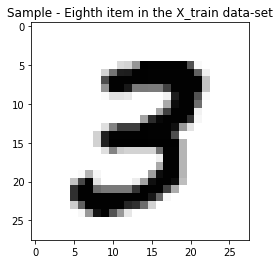

In [168]:
import matplotlib.pyplot as plt
plt.imshow(train[0][7], interpolation = 'nearest', cmap=plt.cm.binary)
plt.title('Sample - Eighth item in the X_train data-set')
plt.show()

### Parameters ###

In [169]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2# convolution kernel size
nb_conv = 3

### Define a Generator Function ###

In [170]:
#yields Batches of 32, each with a flattened 28x28 array for simple (non-CNN) network
# MNIST data has a 28x28 pixel map 
def Generator_basic():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_train = np_utils.to_categorical(y_train,10)  # 10 categories
    #Flatten X_train to a 1-D vector for each image
    X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
    X_test =  X_test.reshape(X_test.shape[0],   img_rows * img_cols) 
    #Do some normalisation of the data 
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    #While-loop generates batches of 32 for each yield-call
    while 1:
        for i in range(1875): # 1875 * 32 = 60000 -> # of training samples
            if i%125==0:
                pass
                #print("i = " + str(i))
            yield X_train[i*32:(i+1)*32], y_train[i*32:(i+1)*32]

In [171]:
#yields Batches of 32
def Generator_CNN():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_train = np_utils.to_categorical(y_train,10)  # 10 categories
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    while 1:
        for i in range(1875): # 1875 * 32 = 60000 -> # of training samples
            if i%125==0:
                print("i = " + str(i))
            yield X_train[i*32:(i+1)*32], y_train[i*32:(i+1)*32]

#### Generator Test ####

In [180]:
generator=Generator_basic()
for i in range(0,2):
    payload = next(generator)
    print("Width of payload:",len(payload),"Payload[0] dims:", np.ndim(payload[0]),"Payload[1] dims:", np.ndim(payload[1]))
    print(len(payload[0]), len(payload[1]))
    #print(payload[0])
    #print(payload[1])
payload[0]

Width of payload: 2 Payload[0] dims: 2 Payload[1] dims: 2
32 32
Width of payload: 2 Payload[0] dims: 2 Payload[1] dims: 2
32 32


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

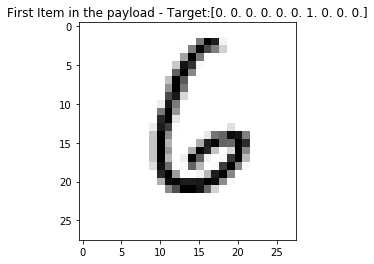

In [182]:
plt.imshow(payload[0][0].reshape(28,28), interpolation = 'nearest', cmap=plt.cm.binary)
plt.title('First Item in the payload - Target:' + str(payload[1][0]) )
plt.show()


### Build a Model ###

#### Create a basic feed-forward ANN ####

In [194]:
model = Sequential()
model.add(Dense(img_rows * img_cols, input_dim=784, activation='relu')) 
model.add(Dense(1024, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.add(Activation('softmax'))

#### Create a CNN Model ####
To-Do

In [195]:
"""
WIP
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
"""

"\nWIP\nmodel.add(Convolution2D(nb_filters, nb_conv, nb_conv,\n                        border_mode='valid',\n                        input_shape=(1, img_rows, img_cols)))\nmodel.add(Activation('relu'))\nmodel.add(Convolution2D(nb_filters, nb_conv, nb_conv))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Flatten())\nmodel.add(Dense(128))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(10))\nmodel.add(Activation('softmax'))\n"

### Compile Model ###

In [196]:
#model.compile(loss='binary_crossentropy', optimizer='adam')
model.compile(loss='categorical_crossentropy', optimizer='adam')

### Fit Model with a Generator ###

https://keras.io/models/model/#fit_generator

The steps_per_epoch parameter sets how many sets of data must be passed in from the generator before moving to the next epoc and re-running the model-fit cycle.  

Only the "step" subset of the data processed in each epoc needs to be loaded into memory.


In [197]:
history=model.fit_generator(Generator_basic(), steps_per_epoch = 1875, epochs = 5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 71s 38ms/step - loss: 1.5338
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 1.4955
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 1.4905
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 1.4876
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 1.4863


### Test Predictions ###

In [198]:
y_test_cat = np_utils.to_categorical(y_test,10)  # 10 categories
X_test_flat = X_test.reshape(len(X_test),img_rows * img_cols)
X_test_flat = X_test_flat.astype('float32')
X_test_flat /= 255 #normalise 0 -> 1

In [199]:
print(X_test_flat.shape)

(10000, 784)


In [200]:
test_predict = model.predict_classes(X_test_flat)

In [201]:
test_predict[0:25]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=int64)

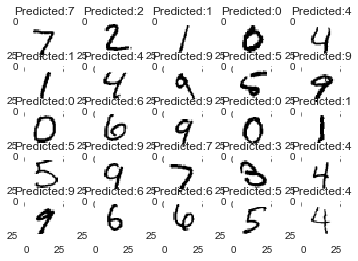

In [202]:
plt.figure(1)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_test_flat[i-1].reshape(28,28), interpolation = 'nearest', cmap=plt.cm.binary)
    plt.title('Predicted:' + str(test_predict[i-1]) )
plt.show()

#### Get Accuracy Score and Print Confusion Matrix ####

In [203]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test, test_predict).round(3)*100, "percent")

Accuracy Score: 96.6 percent


[Text(84.4,0.5,'Predicted Label')]

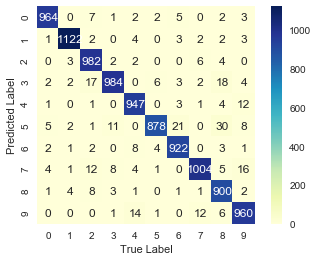

In [204]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

m = confusion_matrix(y_test, test_predict)

ax = sns.heatmap(m.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True
            , xticklabels=[0,1,2,3,4,5,6,7,8,9]
            , yticklabels=[0,1,2,3,4,5,6,7,8,9])

ax.set(xlabel='True Label')
ax.set(ylabel='Predicted Label')